# <h1 align="center"> The Best Times Of The Year To Puchase Tech Stocks</h1>

<h3 align="center">Kevin Song, Vivek Ramani</h3>

<h2 align="center">Introduction</h2>

For readers unfamilar with stocks or the stock market, we will give some basic information and definitions that will aid in understanding the financial terms that are used throughout the tutorial. <br><br>

The <a href="https://www.nerdwallet.com/article/investing/what-is-sp-500">S&P 500</a> is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices and is often used as a measure of how well the overall stock market is performing. A <a href="https://www.investopedia.com/insights/digging-deeper-bull-and-bear-markets/#:~:text=A%20bull%20market%20is%20a,stocks%20are%20declining%20in%20value">Bull Market</a> is a market that is on the rise and when the economy is booming. <br><br>

We are currently experiencing the longest bull market run in history which started in March 9, 2009 and has since seen a 468% gain for the S&P 500 as of November 1, 2019, details <a href="https://www.cnbc.com/2019/11/14/the-markets-10-year-run-became-the-best-bull-market-ever-this-month.html">here</a>. In 2020, the S&P saw an additional 15.3% increase from 2019 and closed at unprecedented all time highs even with the events of the covid pandemic. Out of all 11 sectors in the S&P, the Information Technology sector has seen the most growth with a 390% total return since the end of 2009 to the end of 2019. Full details about how well each sector performed can be found <a href="https://www.marketwatch.com/story/these-are-the-20-best-performing-stocks-of-the-past-decade-and-some-of-them-will-surprise-you-2019-12-09">here</a>. <br><br>

We would like to analyze this historic era, specifically looking at historical data from the past 10 years on stock prices for the three tech giants Apple, Google, and Amazon. We hope through exploratory data analysis, hypothesis testing, and machine learning to identify positive indicators for when to purchase tech stocks. 

<h2 align="center">Gathering The Data</h2>

In our tutorial, we use Python 3 along with the following imported libraries: <a href="https://pandas.pydata.org/docs/">pandas</a>, <a href="https://numpy.org/doc/">numpy</a>,  <a href="https://matplotlib.org/contents.html">matplotlib</a>, <a href="https://seaborn.pydata.org/">seaborn</a>, <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html">ols</a>, <a href="https://docs.python.org/3/library/datetime.html">datetime</a>.

In [1]:
# Import necessary libraries for this tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Change default figure size to display larger figures
plt.rcParams["figure.figsize"] = (18,10)

## Reading the Data

We retrieved historical stock data from the past 10 years for Apple, Google, and Amazon from Yahoo's historical stock database. Specifially, we retrieved data calculated daily from 12/2/2010 to 12/1/2020 for all 3 stocks. The files can be downloaded directly <a href="https://finance.yahoo.com/quote/AAPL/history?p=AAPL">here</a> for Apple, <a href="https://finance.yahoo.com/quote/GOOG/history?p=GOOG">here</a> for Google, and <a href="https://finance.yahoo.com/quote/AMZN/history?p=AMZN">here</a> for Amazon. All downloads are automatically saved as .csv files which we can read in directly using Pandas.

In [2]:
# Get data for Apple from the past 10 years
apple_data = pd.read_csv("AAPL.csv")
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-02,11.340357,11.392858,11.246072,11.362500,9.801870,462837200
1,2010-12-03,11.321786,11.380357,11.297857,11.337143,9.779997,342092800
2,2010-12-06,11.380000,11.511786,11.372143,11.433928,9.863489,448481600
3,2010-12-07,11.564285,11.571072,11.361428,11.364643,9.803719,391454000
4,2010-12-08,11.415358,11.465000,11.325357,11.464643,9.889985,321935600


In [3]:
# Get data for Google from the past 10 years
google_data = pd.read_csv("GOOG.csv")
google_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-02,283.268250,285.594513,281.619415,284.842346,284.842346,5114800
1,2010-12-03,283.661774,287.163635,282.939484,285.430145,285.430145,5282000
2,2010-12-06,289.200989,289.913330,287.228394,288.100128,288.100128,4203200
3,2010-12-07,294.531036,295.392792,291.905853,292.473724,292.473724,6107100
4,2010-12-08,294.879730,295.153687,290.755188,294.167389,294.167389,3526900


In [4]:
# Get data for Amazon from the past 10 years
amazon_data = pd.read_csv("AMZN.csv")
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-02,176.860001,177.449997,173.919998,176.529999,176.529999,5537600
1,2010-12-03,175.500000,176.399994,174.050003,175.679993,175.679993,4907500
2,2010-12-06,175.520004,178.429993,174.600006,178.050003,178.050003,5654200
3,2010-12-07,180.500000,181.470001,176.570007,176.770004,176.770004,5077100
4,2010-12-08,177.490005,178.160004,175.199997,176.289993,176.289993,3726900


In each of the above datasets, there are 7 initial columns. We have: <br>
        - Date 
        - Open (Price of stock when market opens at 9:30 a.m. Eastern time) 
        - High (Highest price of the day)
        - Low (Lowest price of the day)
        - Close (Price of stock when market closes at 4:00 p.m. Eastern time) 
        - Adj Close (Adjusted closing price after accounting for corporate actions) 
        - Volume (Number of shares traded)
    
Most of these titles are self-explanatory. However, we would like to note here that we will be using closing price as opposed to adjusted closing price for our calculations and analysis. This is because we will be working with raw data in all of our other calculations and we would like to keep our analysis consistent. If you would like to learn more about how adjusted closing price differs from closing price, additional information can be viewed <a href="https://www.investopedia.com/terms/a/adjusted_closing_price.asp#:~:text=Key%20Takeaways,price%20before%20the%20market%20closes.">here</a>.

## Tidying and Modifying the Data 

When looking at stock prices, we would like to only observe up to 2 decimal points because prices are typically rounded up to the nearest cent in the marketplace. This is because brokerages cannot accept orders or display quotes with more than 2 places after the decimal if the price is higher than $1 or they will be in violation of regulatory rules.

Additionally, we will include a year and month column taken from the date to help us analyze general patterns in prices over months or years. One use of including this section in the table is so that we can easily drop all data from 2010, since there is only data from the month of December under 2010. As discussed above, we are dropping the adjusted closing price column because we prefer to use closing price in our calculations.

Two important new columns will be created by doing computations from the given data. <br>
    - Percent daily change (measures the difference between closing price and opening price as a percentage) 
    - Volatility (measures the difference between highest recorded price and lowest recorded price) 
    
<a href="https://finance.zacks.com/calculate-daily-price-variation-stocks-8299.html">Percent daily change</a> is the daily price variation in a stock and is one of the measures of volatility. These percentages are often used by investors to assess the risk in purchasing a stock.

<a href="https://www.investopedia.com/ask/answers/021015/what-best-measure-given-stocks-volatility.asp">Volatility</a> is the degree to which prices move. Higher volatility is often associated with more risk as prices fluctuate wildly at drastically different highs and lows while lower volatility is often associated with lower risk as prices are more stable. For the purposes of this tutorial, we will simply calculate daily volatility by observing differences in high and low prices after one trading day because our goal is to find trends over the course of long periods of time. More complicated models of volatility exist that involve computations with the standard deviation of prices over shorter periods of time, and can be found <a href="https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp">here</a> if you wish to learn more about assessing risk with day trading. 

Finally, we create another column in the table that splits years into quarters. Each quarter represents three months so there are 4 quarters in a year. This is because most financial reporting and dividend payments are done on a quarterly basis, and we would like to present our findings in a similar format to account for how financial reportings and dividends may impact stock prices.

In [5]:
# Tidy data to only display up to 2 decimal points
apple_data = apple_data.round(decimals=2)
google_data = google_data.round(decimals=2)
amazon_data = amazon_data.round(decimals=2)

# Stores the year and month in seperate columns
apple_data['Year'] = apple_data['Date'].astype(str).str[0:4]
apple_data['Month'] = apple_data['Date'].astype(str).str[5:7]
google_data['Year'] = google_data['Date'].astype(str).str[0:4]
google_data['Month'] = google_data['Date'].astype(str).str[5:7]
amazon_data['Year'] = amazon_data['Date'].astype(str).str[0:4]
amazon_data['Month'] = amazon_data['Date'].astype(str).str[5:7]

# Drop data in 2010
apple_data = apple_data[apple_data.Year != "2010"]
google_data = google_data[google_data.Year != "2010"]
amazon_data = amazon_data[amazon_data.Year != "2010"]

# Drop adj close column which won't be used
apple_data = apple_data.drop(columns= ["Adj Close"])
google_data = google_data.drop(columns= ["Adj Close"])
amazon_data = amazon_data.drop(columns= ["Adj Close"])

# Finds daily % change in stock price
apple_data['% daily change'] = ((apple_data['Close'] - apple_data['Open'])/ apple_data['Open']) * 100
google_data['% daily change'] = ((google_data['Close'] - google_data['Open'])/ google_data['Open']) * 100
amazon_data['% daily change'] = ((amazon_data['Close'] - amazon_data['Open'])/ amazon_data['Open']) * 100

# Include Volatility section by calculating High - Low price
apple_data['Volatility'] = apple_data['High'] - apple_data['Low']
google_data['Volatility'] = google_data['High'] - google_data['Low']
amazon_data['Volatility'] = amazon_data['High'] - amazon_data['Low']


# Add a column to represent months as quarters with the corresponding year
quarter = []
i = 0
for x in apple_data['Year']: 
    if apple_data.iat[i, 7] == "01" or apple_data.iat[i, 7] == "02" or apple_data.iat[i, 7] == "03":
        quarter.append(x + "-Q1")
    elif apple_data.iat[i, 7] == "04" or apple_data.iat[i, 7] == "05" or apple_data.iat[i, 7] == "06":
        quarter.append(x + "-Q2")
    elif apple_data.iat[i, 7] == "07" or apple_data.iat[i, 7] == "08" or apple_data.iat[i, 7] == "09":
        quarter.append(x + "-Q3")
    else:
        quarter.append(x + "-Q4")
    i = i + 1
    
apple_data['Quarter'] = quarter

quarter = []
i = 0
for x in google_data['Year']: 
    if google_data.iat[i, 7] == "01" or google_data.iat[i, 7] == "02" or google_data.iat[i, 7] == "03":
        quarter.append(x + "-Q1")
    elif google_data.iat[i, 7] == "04" or google_data.iat[i, 7] == "05" or google_data.iat[i, 7] == "06":
        quarter.append(x + "-Q2")
    elif google_data.iat[i, 7] == "07" or google_data.iat[i, 7] == "08" or google_data.iat[i, 7] == "09":
        quarter.append(x + "-Q3")
    else:
        quarter.append(x + "-Q4")
    i = i + 1
    
google_data['Quarter'] = quarter


quarter = []
i = 0
for x in amazon_data['Year']: 
    if amazon_data.iat[i, 7] == "01" or amazon_data.iat[i, 7] == "02" or amazon_data.iat[i, 7] == "03":
        quarter.append(x + "-Q1")
    elif amazon_data.iat[i, 7] == "04" or amazon_data.iat[i, 7] == "05" or amazon_data.iat[i, 7] == "06":
        quarter.append(x + "-Q2")
    elif amazon_data.iat[i, 7] == "07" or amazon_data.iat[i, 7] == "08" or amazon_data.iat[i, 7] == "09":
        quarter.append(x + "-Q3")
    else:
        quarter.append(x + "-Q4")
    i = i + 1
    
amazon_data['Quarter'] = quarter

In [6]:
apple_data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,% daily change,Volatility,Quarter
21,2011-01-03,11.63,11.80,11.60,11.77,445138400,2011,01,1.203783,0.20,2011-Q1
22,2011-01-04,11.87,11.88,11.72,11.83,309080800,2011,01,-0.336984,0.16,2011-Q1
23,2011-01-05,11.77,11.94,11.77,11.93,255519600,2011,01,1.359388,0.17,2011-Q1
24,2011-01-06,11.95,11.97,11.89,11.92,300428800,2011,01,-0.251046,0.08,2011-Q1
25,2011-01-07,11.93,12.01,11.85,12.00,311931200,2011,01,0.586756,0.16,2011-Q1


In [7]:
google_data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,% daily change,Volatility,Quarter
21,2011-01-03,297.13,301.66,297.13,301.05,4748100,2011,01,1.319288,4.53,2011-Q1
22,2011-01-04,301.68,301.96,298.94,299.94,3662600,2011,01,-0.576770,3.02,2011-Q1
23,2011-01-05,298.91,304.03,298.90,303.40,5083500,2011,01,1.502124,5.13,2011-Q1
24,2011-01-06,304.20,308.06,303.89,305.60,4131000,2011,01,0.460224,4.17,2011-Q1
25,2011-01-07,306.81,307.97,303.93,307.07,4218100,2011,01,0.084743,4.04,2011-Q1


In [8]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,% daily change,Volatility,Quarter
21,2011-01-03,181.37,186.00,181.21,184.22,5331400,2011,01,1.571373,4.79,2011-Q1
22,2011-01-04,186.15,187.70,183.78,185.01,5031800,2011,01,-0.612409,3.92,2011-Q1
23,2011-01-05,184.10,187.45,184.07,187.42,3418800,2011,01,1.803368,3.38,2011-Q1
24,2011-01-06,186.50,187.41,185.25,185.86,3179700,2011,01,-0.343164,2.16,2011-Q1
25,2011-01-07,187.88,188.45,183.74,185.49,5221700,2011,01,-1.272089,4.71,2011-Q1


# Exploratory Data Analysis 

In this section, we look at how the price moves in terms of years, quarters, and volume as well as analyze volatility in each stock.

## Comparing Average Daily Percent Change to High and Low Volume Days

A key metric in stock analysis is volume. The more volume a stock has, the more people there are trading that stock. Many days of the year, the stock will trade at an average volume. But on certain days the volume may spike up or drop far below the average. This may be due to news surrounding the company or general investor sentiment on the level of the stock. If you would like to learn more information on high and low volume trading visit: <a href="https://smartasset.com/financial-advisor/high-volume-stocks">Should You Pay Attention to a Stock’s Trading Volume?</a>

In this section, we look to compare the top 20 highest and lowest volume days with the average and see if trading on these outlier dates is beneficial. If a majority of the data points to it swaying in one direction, we can say with reasonable evidence that it is either favorable or unfavorable to hold a trade into these days. 

For more information interpreting low volume visit: <a href="https://finance.zacks.com/mean-stock-price-goes-up-down-little-volume-2497.html#:~:text=A%20stock's%20trade%20volume%20represents,securities%20are%20less%20actively%20trading.">Interpreting Low Volume</a>

In [9]:
# Selects top 20 rows with largest volume
ap_t20_most = apple_data.nlargest(20, 'Volume')
g_t20_most = google_data.nlargest(20, 'Volume')
am_t20_most = amazon_data.nlargest(20, 'Volume')

# Selects top 20 rows with the least volume
ap_t20_least = apple_data.nsmallest(20, 'Volume')
g_t20_least = google_data.nsmallest(20, 'Volume')
am_t20_least = amazon_data.nsmallest(20, 'Volume')

# Finds average volume and daily percent change of the 20 largest volume days 
ap_most_avg_percent = ap_t20_most['% daily change'].mean()
ap_most_avg_vol = ap_t20_most['Volume'].mean()
g_most_avg_percent = g_t20_most['% daily change'].mean()
g_most_avg_vol = g_t20_most['Volume'].mean()
am_most_avg_percent = am_t20_most['% daily change'].mean()
am_most_avg_vol = am_t20_most['Volume'].mean()

# Finds average volume and daily percent change of the 20 smallest volume days 
ap_least_avg_percent = ap_t20_least['% daily change'].mean()
ap_least_avg_vol = ap_t20_least['Volume'].mean()
g_least_avg_percent = g_t20_least['% daily change'].mean()
g_least_avg_vol = g_t20_least['Volume'].mean()
am_least_avg_percent = am_t20_least['% daily change'].mean()
am_least_avg_vol = am_t20_least['Volume'].mean()

# Finds average volume and daily percent change of last 10 years
ap_avg_percent = apple_data['% daily change'].mean()
ap_avg_vol = apple_data['Volume'].mean()
g_avg_percent = google_data['% daily change'].mean()
g_avg_vol = google_data['Volume'].mean()
am_avg_percent = amazon_data['% daily change'].mean()
am_avg_vol = amazon_data['Volume'].mean()

In the following plots, the black crosses denote the average daily % change by volume the Top 20 highest and lowest volume days while the green cross denotes the average daily % change by volume over the last 10 years. 

Text(0, 0.5, 'Daily % Change')

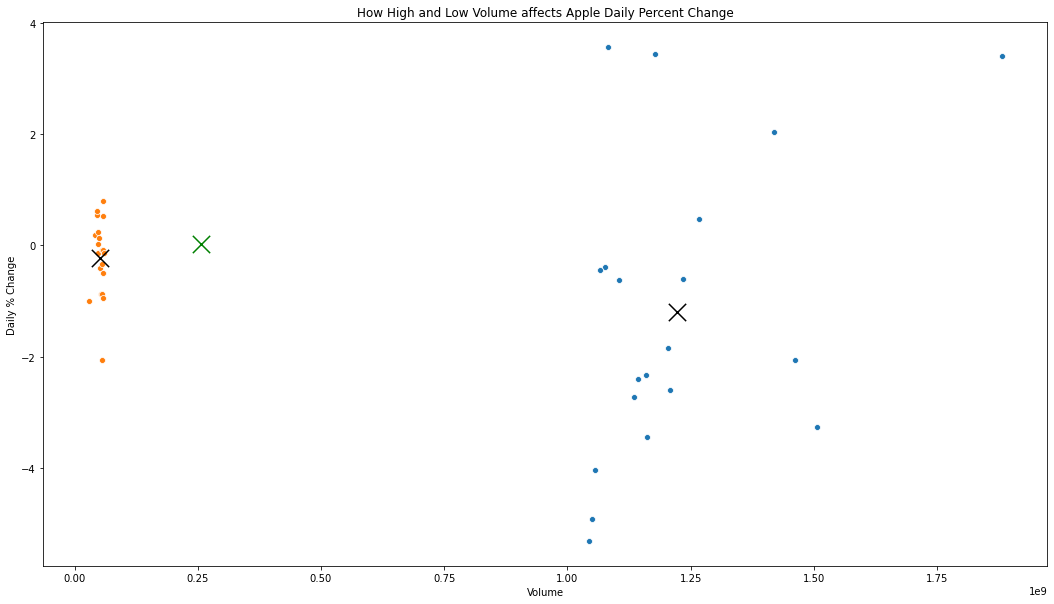

In [10]:
# Plots all individual points for Apple Dataset (Top 20 most and least volume days)
sns.scatterplot(data=ap_t20_most, x="Volume", y="% daily change")
sns.scatterplot(data=ap_t20_least, x="Volume", y="% daily change")

# Plots averages
plt.scatter(ap_most_avg_vol, ap_most_avg_percent, marker='x', s=300, color = 'black')
plt.scatter(ap_least_avg_vol, ap_least_avg_percent, marker='x', s=300, color = 'black')
plt.scatter(ap_avg_vol, ap_avg_percent, marker='x', s=300, color = 'Green')

plt.title('How High and Low Volume affects Apple Daily Percent Change')
plt.xlabel("Volume")
plt.ylabel("Daily % Change")

This scatter plot for Apple Data shows that on low volume days there tends to be minimal movement in the stock price but as seen by the average, it points slightly towards being negative on the day. However, for very high volume days, apple stock generally takes a tumble, losing about 1% of its total value that day. Although the data shows that there can be positive days with high volume, the peaks of these high volume days do not hit 4% increases while the troughs fall well below -4%.

When comparing the averages of these outlier days, we see that it is far more risky to hold a position into high and low volume days compared to your average trading day. For long term investors who have faith in the company at large, these days will be a temporary blemish in the portfolio that will likely be looked over in the long run. However for short term traders or options traders, holding a position into these days for Apple stock might lead to a significant, unrecoverable loss.

Text(0, 0.5, 'Daily % Change')

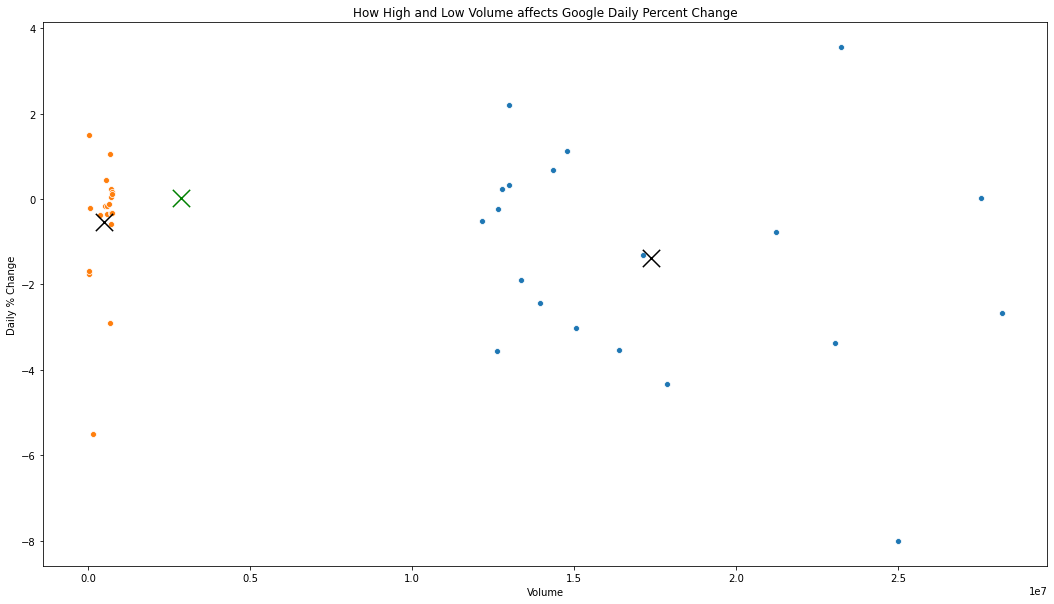

In [11]:
# Plots all individual points for Google Dataset (Top 20 most and least volume days)
sns.scatterplot(data=g_t20_most, x="Volume", y="% daily change")
sns.scatterplot(data=g_t20_least, x="Volume", y="% daily change")

# Plots averages
plt.scatter(g_most_avg_vol, g_most_avg_percent, marker='x', s=300, color = 'black')
plt.scatter(g_least_avg_vol, g_least_avg_percent, marker='x', s=300, color = 'black')
plt.scatter(g_avg_vol, g_avg_percent, marker='x', s=300, color = 'Green')

plt.title('How High and Low Volume affects Google Daily Percent Change')
plt.xlabel("Volume")
plt.ylabel("Daily % Change")

Google suffers a similar fault that Apple faces. As you can see, the averages for both high and low volume days are negative with a majority of the points indicating the stock will pullback on these days. Once again, we see that the potential for positive gain on high volume days is far less than the potential for enormous loss. When comparing these values to the average daily change, we see that as expected, google tends to increase its value by a very small percentage each day. This indicates that hold a position on the average day will be far safer than risking your money on a high or low volume day.

Text(0, 0.5, 'Daily % Change')

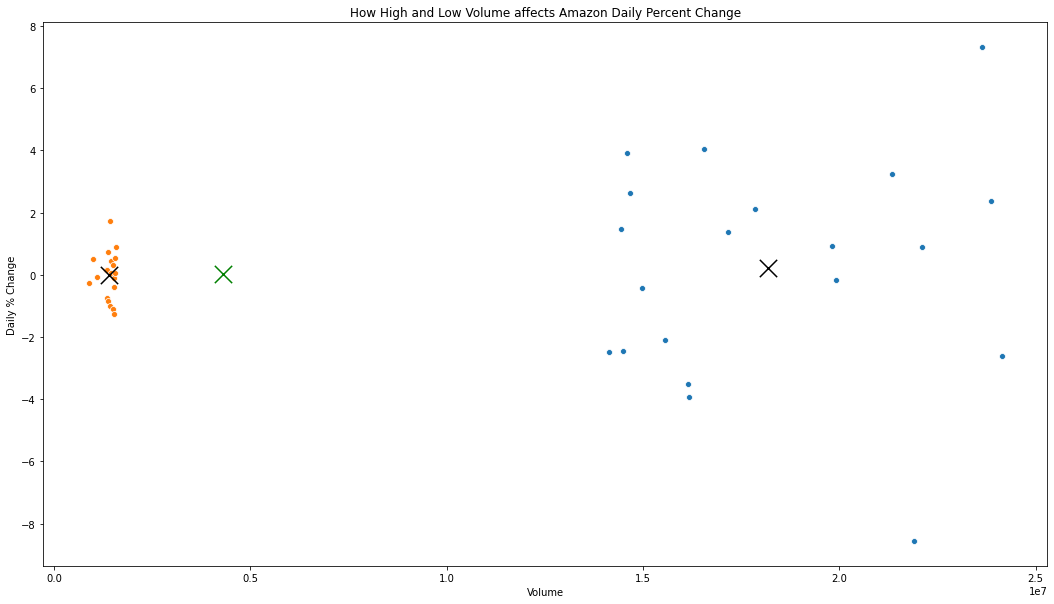

In [12]:
# Plots all individual points for Amazon Dataset(Top 20 most and least volume days)
sns.scatterplot(data=am_t20_most, x="Volume", y="% daily change")
sns.scatterplot(data=am_t20_least, x="Volume", y="% daily change")

# Plots averages
plt.scatter(am_most_avg_vol, am_most_avg_percent, marker='x', s=300, color = 'black')
plt.scatter(am_least_avg_vol, am_least_avg_percent, marker='x', s=300, color = 'black')
plt.scatter(am_avg_vol, am_avg_percent, marker='x', s=300, color = 'Green')

plt.title('How High and Low Volume affects Amazon Daily Percent Change')
plt.xlabel("Volume")
plt.ylabel("Daily % Change")

On the other hand, Amazon differs from both Apple and Google in this trend. On low volume days, Amazon has a very small increase. This increase is very similar to the daily growth rate and shows a fairly unharming sign. When looking at high volume days, we see that a majority of time Amazon's stock value increases. On average we see that the daily change on high volume days is at about 1% compared to a regular day increase of just 0.02% and when put into perspective, Amazon stock is trading at around 3000 dollars. That would be a 30 dollar increase in one day! If you are thinking "I have seen Amazon stock go up 200 dollars in a day" or "Tesla went up 100 dollars one day last week", this is a daily average(on high volume days). If Amazon stock were to go up 30 dollars a day on average, in a year it would go up by over 9000 dollars.

Many of these high volume days also have even higher gains than 1% showing that holding your trades through high volume days will likely be favorable. Rarely does Amazon hold at its previous level on high volume days and more often than not, it has a fairly large increase. High volume days for Amazon are a day traders heaven and long term investors will defintely love to see a nice boost in their portfolio.

##  Graphing Distributions for Closing Price over Time

Before moving on the analyze quarterly changes in stock prices and volatility, we would like to observe the general trend for closing price across time. By creating violin plots, we can visually see the distribution of stock prices and address any outliers that are likely to affect our upcoming linear regression models.

Text(0.5, 1.0, 'Apple Stock Closing Price over Time')

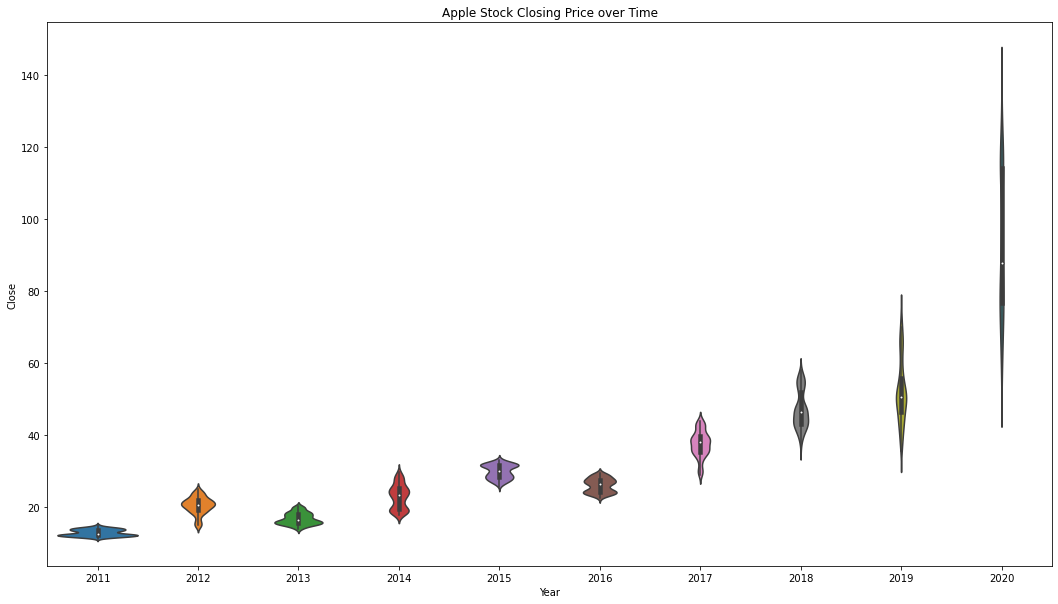

In [13]:
sns.violinplot(x = apple_data['Year'], y = apple_data['Close'])
plt.title("Apple Stock Closing Price over Time")

From Apple's violin plot, the distribution of closing price over time appears to be skewed to the left, with a linear relationship between price and time. However, the year 2020 seems to be a huge outlier with a very big difference between high and low prices which may affect our future calculations when observing volatility and when fitting a linear regression model. Specifically, we noticed that there is a trend where each distribution gets thinner over time which means that the stocks are becomming more volatile with time.

Text(0.5, 1.0, 'Google Stock Closing Price over Time')

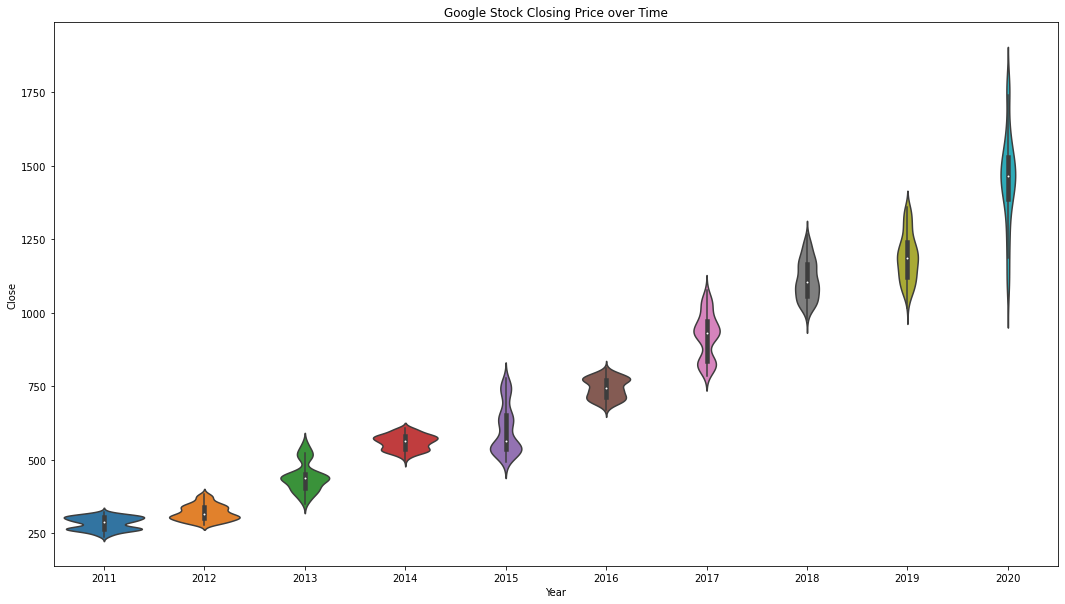

In [14]:
sns.violinplot(x = google_data['Year'], y = google_data['Close'])
plt.title("Google Stock Closing Price over Time")

From Google's violin plot, the distribution of closing price over time also appears to be skewed to the left, with a clear linear relationship between price and time. Similar, the year 2020 has a big difference between high and low prices which may affect future calculations when observing volatility, but fitting a linear regression model for Google should be fairly accurate as the stock appears to be much less volatile than Apple. Again, we noticed the trend where the distributions are getting thinner over time which means that the stocks are becomming more volatile.

Text(0.5, 1.0, 'Amazon Stock Closing Price over Time')

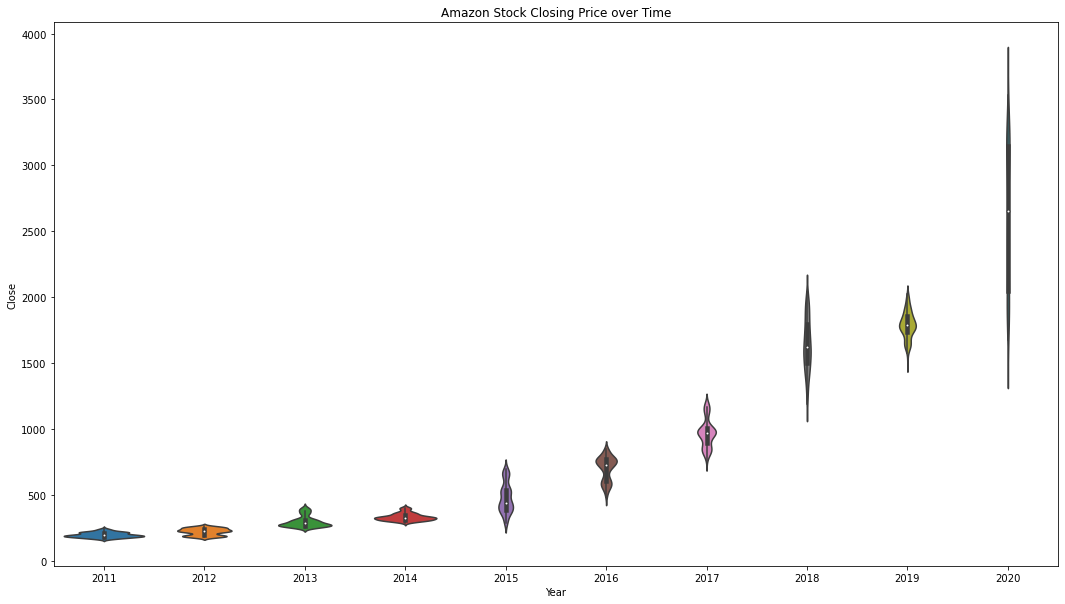

In [15]:
sns.violinplot(x = amazon_data['Year'], y = amazon_data['Close'])
plt.title("Amazon Stock Closing Price over Time")

From Amazon's violin plot, the distribution of closing price over time is also skewed to the left, with a clear linear relationship between price and time. The years 2018 and 2020 stand out as having a big difference between high and low prices which may affect future calculations when observing volatility, and make fitting a linear regression model for Amazon difficult. Again, we noticed the trend where the distributions are getting thinner over time which means that the stocks are becomming more volatile, with the exception of 2018 being more volatile than 2019.

## Graphing Average Volatility Across Quarters

We decided to split each dataset in half so the relationship between volatility and time can be more easily observed. From the violin plots in the previous section, we noted how there seemed to be greater volatility over time. The following graphs can help us observe this trend in greater detail and observe if there is any pattern in which quarters are the most volatile. 

In [ ]:
# Graph Apple's Average Volatility for each Quarter in Years 2011-2015
apple_data1 = apple_data.query('Year == "2011" or Year == "2012" or Year == "2013" or Year == "2014" or Year == "2015"')

for x in apple_data1['Quarter']:
    # Calculate Average Volatility per Quarter
    y = (apple_data1.loc[apple_data['Quarter'] == x, 'Volatility'].mean())
    plt.scatter(x,y)
    
plt.title("Apple Stock Average Volatility Per Quarter in Years 2011-2015")
plt.xlabel("Quarters")
plt.ylabel("Volatility")

In the first half of the Apple dataset, volatility seems to be increasing over time. However, there is a lot of variation between quarters and there is no clear relationship indicating which quarters are the most volatile.

In [ ]:
# Graph Google's Average Volatility for each Quarter in Years 2011-2015
google_data1 = google_data.query('Year == "2011" or Year == "2012" or Year == "2013" or Year == "2014" or Year == "2015"')

for x in google_data1['Quarter']:
    # Calculate Average Volatility per Quarter
    y = (google_data1.loc[google_data['Quarter'] == x, 'Volatility'].mean())
    plt.scatter(x,y)
    
plt.title("Google Stock Average Volatility Per Quarter in Years 2011-2015")
plt.xlabel("Quarters")
plt.ylabel("Volatility")

In the first half of the Google dataset, volatility seems to be increasing over time. While there is still a lot of variation between quarters, there does seem to be a pattern of the stock being more volatile around the end of the year which can be observed when comparing Q3 and Q4 average volatility as opposed to Q1 and Q2 average volatility of the same given year.

In [ ]:
# Graph Amazon's Average Volatility for each Quarter in Years 2011-2015
amazon_data1 = amazon_data.query('Year == "2011" or Year == "2012" or Year == "2013" or Year == "2014" or Year == "2015"')

for x in amazon_data1['Quarter']:
    # Calculate Average Volatility per Quarter
    y = (amazon_data1.loc[amazon_data['Quarter'] == x, 'Volatility'].mean())
    plt.scatter(x,y)
    
plt.title("Amazon Stock Average Volatility Per Quarter in Years 2011-2015")
plt.xlabel("Quarters")
plt.ylabel("Volatility")

In the first half of the Amazon dataset, volatility seems to be increasing over time. The pattern that emerges here is very similar to Google and where the stock appear to be more volatile around the end of the year.

In [ ]:
# Graph Apple's Average Volatility for each Quarter in Years 2016-2020
apple_data1 = apple_data.query('Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019" or Year == "2020"')

for x in apple_data1['Quarter']:
    # Calculate Average Volatility per Quarter
    y = (apple_data1.loc[apple_data['Quarter'] == x, 'Volatility'].mean())
    plt.scatter(x,y)
    
plt.title("Apple Stock Average Volatility Per Quarter in Years 2016-2020")
plt.xlabel("Quarters")
plt.ylabel("Volatility")

In the second half of the Apple dataset, there is a clear linear relationship between volatility over time with a huge outlier in the year 2020. With the exception of 2016, the pattern of tech stocks being more volatile in Q3 and Q4 emerges in this plot.

In [ ]:
# Graph Google's Average Volatility for each Quarter in Years 2016-2020
google_data1 = google_data.query('Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019" or Year == "2020"')

for x in google_data1['Quarter']:
    # Calculate Average Volatility per Quarter
    y = (google_data1.loc[google_data['Quarter'] == x, 'Volatility'].mean())
    plt.scatter(x,y)
    
plt.title("Google Stock Average Volatility Per Quarter in Years 2016-2020")
plt.xlabel("Quarters")
plt.ylabel("Volatility")

In the second half of the Google dataset, while there is an overall linear relationship between volatility over time, there does not seem to be any clear relationships between volatility and quarters.

In [ ]:
# Graph Amazon's Average Volatility for each Quarter in Years 2016-2020
amazon_data1 = amazon_data.query('Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019" or Year == "2020"')

for x in amazon_data1['Quarter']:
    # Calculate Average Volatility per Quarter
    y = (amazon_data1.loc[amazon_data['Quarter'] == x, 'Volatility'].mean())
    plt.scatter(x,y)
    
plt.title("Amazon Stock Average Volatility Per Quarter in Years 2016-2020")
plt.xlabel("Quarters")
plt.ylabel("Volatility")

In the second half of the Amazon dataset, there is a clear linear relationship between volatility over time. With the exception of 2019, volatility does appear to increase in Q3 and Q4 which implies that Amazon tends to be more volatile later in the year.

## Stock Price Percent Quarterly Change

For the final analysis, we would like to see which quarter is the best for investing in these three tech giants. We compare the total change for the entire quarter for each year. Then we plot 10 different lines that show this data and compare each value to the average for the quarter across all years. 

Interpreting this information is very useful. It allows us to learn more about patterns that these stocks trade in. For example, one might expect the first quarter for Amazon to be very successful as investors will have heard about the previous quarters sales during the holidays and buy Amazon shares. We will explore these relationships in this section.

In [ ]:
# Standardized Quarters across all years
apple_data['Standardized Quarter'] = (apple_data['Quarter'].astype(str).str[5:7])
google_data['Standardized Quarter'] = (google_data['Quarter'].astype(str).str[5:7])
amazon_data['Standardized Quarter'] = (amazon_data['Quarter'].astype(str).str[5:7])

# Finds unique years and quarters
ap_uniq_q = apple_data['Standardized Quarter'].drop_duplicates()
ap_years = apple_data['Year'].drop_duplicates()
g_uniq_q = google_data['Standardized Quarter'].drop_duplicates()
g_years = google_data['Year'].drop_duplicates()
am_uniq_q = amazon_data['Standardized Quarter'].drop_duplicates()
am_years = amazon_data['Year'].drop_duplicates()

# Creates new dataframe to handle total change data
apdf = pd.DataFrame(columns = ['Years', 'Quarters', 'Total % Change'])
gdf = pd.DataFrame(columns = ['Years', 'Quarters', 'Total % Change'])
amdf = pd.DataFrame(columns = ['Years', 'Quarters', 'Total % Change'])

for i in ap_years:
    for j in ap_uniq_q:
        # Calculates total change across the year quarter combination
        total = apple_data.loc[(apple_data['Year'] == i) & (apple_data['Standardized Quarter'] == j), '% daily change'].sum()
        newrow = {'Years':i, 'Quarters': j, 'Total % Change': total}
        # Adds data to the new dataframe
        apdf = apdf.append(newrow, ignore_index=True)

for i in g_years:
    for j in g_uniq_q:
        total = google_data.loc[(google_data['Year'] == i) & (google_data['Standardized Quarter'] == j), '% daily change'].sum()
        newrow = {'Years':i, 'Quarters': j, 'Total % Change': total}
        gdf = gdf.append(newrow, ignore_index=True)

        
for i in am_years:
    for j in am_uniq_q:
        total = amazon_data.loc[(amazon_data['Year'] == i) & (amazon_data['Standardized Quarter'] == j), '% daily change'].sum()
        newrow = {'Years':i, 'Quarters': j, 'Total % Change': total}
        amdf = amdf.append(newrow, ignore_index=True)

# Finds total averages across each quarter
apdfQ1_avg = apdf.loc[apdf['Quarters'] == "Q1", 'Total % Change'].mean()
apdfQ2_avg = apdf.loc[apdf['Quarters'] == "Q2", 'Total % Change'].mean()
apdfQ3_avg = apdf.loc[apdf['Quarters'] == "Q3", 'Total % Change'].mean()
apdfQ4_avg = apdf.loc[apdf['Quarters'] == "Q4", 'Total % Change'].mean()
gdfQ1_avg = gdf.loc[gdf['Quarters'] == "Q1", 'Total % Change'].mean()
gdfQ2_avg = gdf.loc[gdf['Quarters'] == "Q2", 'Total % Change'].mean()
gdfQ3_avg = gdf.loc[gdf['Quarters'] == "Q3", 'Total % Change'].mean()
gdfQ4_avg = gdf.loc[gdf['Quarters'] == "Q4", 'Total % Change'].mean()
amdfQ1_avg = amdf.loc[amdf['Quarters'] == "Q1", 'Total % Change'].mean()
amdfQ2_avg = amdf.loc[amdf['Quarters'] == "Q2", 'Total % Change'].mean()
amdfQ3_avg = amdf.loc[amdf['Quarters'] == "Q3", 'Total % Change'].mean()
amdfQ4_avg = amdf.loc[amdf['Quarters'] == "Q4", 'Total % Change'].mean()

applot= apdf.pivot(index = 'Quarters', columns = 'Years', values = 'Total % Change')
gplot= gdf.pivot(index = 'Quarters', columns = 'Years', values = 'Total % Change')
amplot= amdf.pivot(index = 'Quarters', columns = 'Years', values = 'Total % Change')

Note: In the following plots, the black cross markets the average for that quarter

In [ ]:
# Plots lines for each year
sns.lineplot(data = applot, marker = "o", dashes = False)

# Plots averages
plt.scatter("Q1", apdfQ1_avg, marker='x', s=300, color = 'black')
plt.scatter("Q2", apdfQ2_avg, marker='x', s=300, color = 'black')
plt.scatter("Q3", apdfQ3_avg, marker='x', s=300, color = 'black')
plt.scatter("Q4", apdfQ4_avg, marker='x', s=300, color = 'black')

plt.title("Apple Stock Total Percent Quarterly Change")
plt.xlabel("Quarters")
plt.ylabel("Total % Change")

After examining this plot, we see that there is a large variance in Q1 and Q4 data while Q2 and Q3 data is much closer together. When looking at the averages for each quarter, Q1 and Q3 have more postive average total change while Q2 and Q4 tend to have minimal change or even minor losses. 2014 is the year that probably has the least variation on this plot. It had a minor loss in the first quarter, gained a lot in the second and mellowed out the rest of the year. 2012 seems to have had the largest variation. Every other quarter apple stock either did very well or very poorly likely causing the stock price to end the year very similar to how it started. As 2020 has been a crazy ride, we can see that this data reflects exactly that. Early in the year, everybody was doing well and then the pandemic started at the begining of the second quarter. It was only until the third quarter that the losses really started to show and then in the end of the year, the market bounced back.

In [ ]:
sns.lineplot(data = gplot, marker = "o", dashes = False)

plt.scatter("Q1", gdfQ1_avg, marker='x', s=300, color = 'black')
plt.scatter("Q2", gdfQ2_avg, marker='x', s=300, color = 'black')
plt.scatter("Q3", gdfQ3_avg, marker='x', s=300, color = 'black')
plt.scatter("Q4", gdfQ4_avg, marker='x', s=300, color = 'black')
    
plt.title("Google Stock Total Percent Quarterly Change")
plt.xlabel("Quarters")
plt.ylabel("Total % Change")

Google is different from Apple in that on average, 3 of the 4 quarters have positive change while only Q2 has a slight negative total change. Google's averages are also less extreme than Apple's ranging very close to both sides of 0. However, on a yearly basis, we see that both Google and Apple are capable of very large increases and decreases in price in the quarter. Once again 2012 stands out as the year with the largest variation. Google went from nearly a -10% loss in quarter 2 to far more than a 20% gain in quarter 3. This trend for Q3 hold for many other years making it the overall best quarter to invest in Google. Q1 also seems like a good time to invest as 2014 data can be considered an outlier however Q3 still has more favorable data to support an investment during this time.

In [ ]:
sns.lineplot(data = amplot, marker = "o", dashes = False)

plt.scatter("Q1", amdfQ1_avg, marker='x', s=300, color = 'black')
plt.scatter("Q2", amdfQ2_avg, marker='x', s=300, color = 'black')
plt.scatter("Q3", amdfQ3_avg, marker='x', s=300, color = 'black')
plt.scatter("Q4", amdfQ4_avg, marker='x', s=300, color = 'black')

plt.title("Amazon Stock Total Percent Quarterly Change")
plt.xlabel("Quarters")
plt.ylabel("Total % Change")

Amazon's Quarterly Change shows a negative correlation between total change and the quarter. Q1 has the highest highs as well as the highest average, while Q4 has the lowest lows and the lowest average change. Q4 is the only quarter that has a negative average change while the others show that Amazon's stock will be increasing. Q2 and Q3 have the least variance amongst the years. 2012 and 2014 remain as ouliers for Q1 but even without these the general trend remains the same. With Q1 having around an 8% increase, investing in Amazon during this time of the year is ideal. For longer term traders, holding your positions throughout until Q4 will likely result in great returns. Shorter term traders should look at either Q1 or Q4 for more variance in the market to capitalize on.

<h2 align="center">Predicting Prices</h2>

In our last section, we will develop a model to predict closing prices with date acting as the predictor. Later on we will be able to determine whether we are able to reject the null hypothesis by looking at the p-value for each model.

When determining proper training and testing data we analyzed which years would leave us with the best representation of what happened in history and how it may continue in the future. For this reason, we did not include 2011 and 2012 as they were far more stagnant in terms of growth. Including 2020 would be a large mistake when trying to find an accurate model for the entire decade as this year has been a large outlier. Therefore, it was not chosen to be in the training set. We added it into the testing set knowing that there would be a large deviation from the regression line due to the boom this year has had.

One last part before we can start fitting the model is to convert the date attribute to an ordinal value that can be fitted.

In [ ]:
# Use data from 2013-2019 to train our model
training_apple_data = apple_data.query('Year == "2013" or Year == "2014" or Year == "2015" or Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019"')
training_google_data = google_data.query('Year == "2013" or Year == "2014" or Year == "2015" or Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019"')
training_amazon_data = amazon_data.query('Year == "2013" or Year == "2014" or Year == "2015" or Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019"')

# Use data from 2014-2020 to test our model
testing_apple_data = apple_data.query('Year == "2014" or Year == "2015" or Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019" or Year == "2020"')
testing_google_data = google_data.query('Year == "2014" or Year == "2015" or Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019" or Year == "2020"')
testing_amazon_data = amazon_data.query('Year == "2014" or Year == "2015" or Year == "2016" or Year == "2017" or Year == "2018" or Year == "2019" or Year == "2020"')

# Change date from string to int values so regression can be performed
training_apple_data['Date_O'] = pd.to_datetime(training_apple_data['Date'])
training_apple_data['Date_O'] = training_apple_data['Date_O'].map(dt.datetime.toordinal)
testing_apple_data['Date_O'] = pd.to_datetime(testing_apple_data['Date'])
testing_apple_data['Date_O'] = testing_apple_data['Date_O'].map(dt.datetime.toordinal)
training_google_data['Date_O'] = pd.to_datetime(training_google_data['Date'])
training_google_data['Date_O'] = training_google_data['Date_O'].map(dt.datetime.toordinal)
testing_google_data['Date_O'] = pd.to_datetime(testing_google_data['Date'])
testing_google_data['Date_O'] = testing_google_data['Date_O'].map(dt.datetime.toordinal)
training_amazon_data['Date_O'] = pd.to_datetime(training_google_data['Date'])
training_amazon_data['Date_O'] = training_amazon_data['Date_O'].map(dt.datetime.toordinal)
testing_amazon_data['Date_O'] = pd.to_datetime(testing_amazon_data['Date'])
testing_amazon_data['Date_O'] = testing_amazon_data['Date_O'].map(dt.datetime.toordinal)

We are ready to begin training and testing the model!

In [ ]:
predicted = []
# Fits model
reg_apple = ols(formula='Close ~ Date_O', data=training_apple_data).fit()
# Predicts on tested data
predicted = reg_apple.predict(testing_apple_data['Date_O'])
testing_apple_data['predicted'] = predicted

predicted = []
reg_google = ols(formula='Close ~ Date_O', data=training_google_data).fit()
predicted = reg_google.predict(testing_google_data['Date_O'])
testing_google_data['predicted'] = predicted

predicted = []
reg_amazon = ols(formula='Close ~ Date_O', data=training_amazon_data).fit()
predicted = reg_amazon.predict(testing_amazon_data['Date_O'])
testing_amazon_data['predicted'] = predicted

In [ ]:
# Converts String to Date time
testing_apple_data['Date'] = pd.to_datetime(testing_apple_data['Date'])
testing_google_data['Date'] = pd.to_datetime(testing_google_data['Date'])
testing_amazon_data['Date'] = pd.to_datetime(testing_amazon_data['Date'])

In [ ]:
sns.lineplot(x = testing_apple_data.Date, y = testing_apple_data.predicted)
sns.lineplot(x = testing_apple_data.Date, y = testing_apple_data.Close)

When comparing the blue regression line and the orange stock price, we see that for a majority of the plot, the regression line holds a very decent best fit line amongst the data. There is only the end portion of the plot corresponding to 2020 that fails this and that is to be expected. From the naked eye, the regression line seems to be doing its job but we can confirm if this is the case by looking at the R-squared and p values.

In [ ]:
sns.lineplot(x = testing_google_data.Date, y = testing_google_data.predicted)
sns.lineplot(x = testing_google_data.Date, y = testing_google_data.Close)

This google plot comparing the regression line and the stock price shows that the model found a very good best fit line even accounting for 2020 data points. In the earlier years tested, the residuals for this plot would not be far off from zero and aren't nearly as bad for 2020 as previously expected. Once again we visit the model summary to see statistics that will tell us if this is true.

In [ ]:
sns.lineplot(x = testing_amazon_data.Date, y = testing_amazon_data.predicted)
sns.lineplot(x = testing_amazon_data.Date, y = testing_amazon_data.Close)

The amazon model is not too far off from the google model in the early years of testing but suffers the same effects as the apple model in the year of 2020. We will examine the R-squared value and p-value to determine how accurate the model really is and see if there is a true relationship between the date and closing price.

In [ ]:
reg_apple.summary()

By looking at Apple's model summary, we see that it has an R-squared value of 0.857 and P values of 0. These are very strong indicators letting us know that the model is infact a good one. Since the pvalue is less than 0.05, we say that with 95% confidence, the coefficient does not include zero. With this information we can reject the null hypothesis and say that there is a clear relationship between the date and the price. Logically speaking, this makes sense. The R-squares value is quite close to 1 showing that the model is account for more of the variance than not. Although, the warnings do state that there is likely multicollinearity, that does not discredit this linear model, but simply states that it can be better.

In [ ]:
reg_google.summary()

The Google model has an even better prediction rate than the apple model having a R-squared value even closer to 1. This showcases the strong correlation between date and price. Once again the P values are less than 0.05 meaning we can reject the null hypothesis.

In [ ]:
reg_amazon.summary()

The Amazon model seems to have a prediction accuracy level somewhere in between the one of google and apple. Nevertheless, it is still a very good model with a R-squared value only about 0.1 away from 1 and a p value of 0. This means we can confirm that there is a relationship between date and price and we have created a good model.

<h2 align="center">Conclusion and Future Endeavors</h2>

Right now, more than ever, the stock market is catching everybody's eye. Tech stocks are at the core of the recent market boom and the three companies here, Apple, Google, and Amazon are giants in the tech industry. Furthermore, many other tech stocks traded in the market follow similar trends to these three companies making it vital for us to understand the historical progression of these companies. By going through the entire data science pipeline, we learned a lot about past trends that these companies have had giving us more insight on when might be the best times to invest. Also, creating a linear regression model that predicts the price of the stock allowed us to learn about the differences in expected and predicted values. After seeing our results, it really gave us perspective on how much of an outlier 2020 has been.

In the future, we hope to continue improving our model and drawing other unique conclusions by examining other trends between the data. Something we would have liked to test and predict was the chance of the stock gapping up. This is when the stock price has a significant increase between the close and open of the next day. This type of information would be very important for day traders. We would have also liked to improve our model by adding more variables or interaction terms like volume that would help increase the accuracy of the model. A multiple linear regression model or higher degrees of regression would also likely increase the accuracy of the model. We hope that reading this tutorial gave you more insight on how market factors affect the price of these three very popular stocks. We also hope you will consider the information presented here when deciding when to enter your next trade. If you are new to the market or just interested in any of these stocks, we hope you enjoyed the read and learned something new.